In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Fenics solution

In [2]:
true = np.load('../Fenics/fenics_data_dt0.005_T1.0/u1.npy')

In [3]:
true = true[:200,:]

#### SciANN solution

In [4]:
preds = np.load(f'../PDM_PINN/Sciann/SciANN_Bruger_2.npy')

#### Plot

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

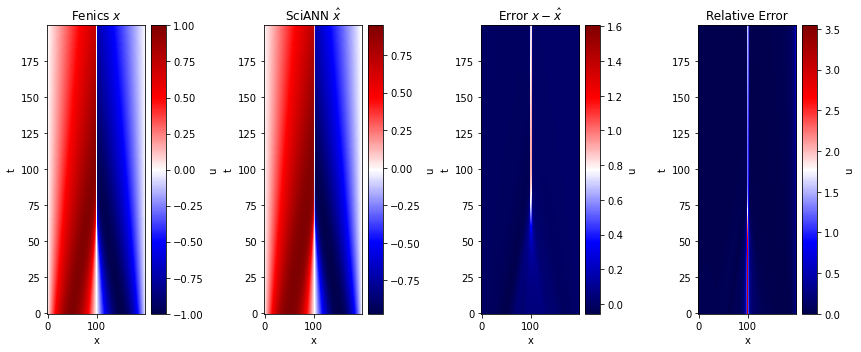

In [7]:
fig, ax = plt.subplots(1,4,figsize=(12,5))

im1 = ax[0].imshow(true,origin='lower',cmap='seismic',aspect='auto')
ax[0].set_xlabel('x')
ax[0].set_ylabel('t')
ax[0].title.set_text('Fenics $x$')

plt.colorbar(im1, ax=ax[0],label='u')

im2 = ax[1].imshow(preds,origin='lower',cmap='seismic',aspect='auto')
ax[1].set_xlabel('x')
ax[1].set_ylabel('t')
ax[1].title.set_text('SciANN $\hat{x}$')

plt.colorbar(im2, ax=ax[1],label='u')

im3 = ax[2].imshow(preds-true,origin='lower',cmap='seismic',aspect='auto')
ax[2].set_xlabel('x')
ax[2].set_ylabel('t')
ax[2].title.set_text('Error $x-\hat{x}$')

plt.colorbar(im3, ax=ax[2],label='u')

abs_error = (preds-true)/true
abs_error = np.where(np.abs(abs_error)>100,0,np.abs(abs_error))

im4 = ax[3].imshow(abs_error,origin='lower',cmap='seismic',aspect='auto')
ax[3].set_xlabel('x')
ax[3].set_ylabel('t')
ax[3].title.set_text('Relative Error')

plt.colorbar(im4, ax=ax[3],label='u')

plt.tight_layout()
plt.savefig('Analysis.png',bbox_inches ='tight')